# ___________________  Real OR Fake News Analysis  ___________________

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = 'Fake.csv'
Fake_df = pd.read_csv(csv_file, encoding='ISO-8859-1')

In [3]:
Fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
Fake_df.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [8]:

True_df = pd.read_csv("True.csv", encoding = 'unicode_escape', error_bad_lines=False)

Skipping line 11067: expected 4 fields, saw 8



In [9]:
True_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
True_df.tail()

,title,text,subject,date
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21415,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [11]:
News_df = pd.concat([Fake_df, True_df], ignore_index=True)
News_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


# Combined_news_data

In [12]:
# TF column with 0 for fake news and 1 for true news.

News_df['TF'] = 0
News_df.loc[len(Fake_df):, 'TF'] = 1
News_df

,title,text,subject,date,TF
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [13]:
# Save the file as new csv
News_df.to_csv('combined_news_data.csv', index=False)

# Data Preparation

In [14]:
News_df = pd.read_csv("combined_news_data.csv", index_col='date', parse_dates=True)
News_df

,title,text,subject,TF
date,,,,
"December 31, 2017",Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,0
"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
"December 29, 2017",Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,0
"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
...,...,...,...,...
"August 22, 2017",'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1
"August 22, 2017",LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1
"August 22, 2017",Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1


In [15]:
News_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44897 entries, December 31, 2017 to August 22, 2017 
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   TF       44897 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [16]:
News_df.isnull().sum()

title      0
text       0
subject    0
TF         0
dtype: int64

In [17]:
News_df.duplicated().sum()

213

In [18]:
News_df=News_df.drop_duplicates()

In [19]:
News_df.duplicated().sum()

0

In [20]:
# Optionally, shuffle the combined dataset to ensure randomness

News_df = News_df.sample(frac=1).reset_index(drop=True)
News_df

,title,text,subject,TF
0,Western powers press Iraq Kurd leaders to shel...,"ERBIL/KIRKUK, Iraq (Reuters) - The United Stat...",worldnews,1
1,Hot Mic Captures Humiliating Moment Trump Tel...,"Thankfully, Chris Christie proved he was beyon...",News,0
2,"Donald Trumps First Campaign TV Ad Is Here, ...",While an armed militia group of domestic terro...,News,0
3,COLLECTING THE MONEY FOR THE WALL? MEXICO STAR...,Don t you just love the absolute boldness of t...,Government News,0
4,American Spring Breakers Chant Trumps Build...,While a group of Americans were vacationing in...,News,0
...,...,...,...,...
44679,"Saudi Arabia intercepts Yemeni missile, second...",DUBAI (Reuters) - A ballistic missile fired by...,worldnews,1
44680,Republican 2016 platform calls for reinstating...,CLEVELAND (Reuters) - The U.S. Republican Part...,politicsNews,1
44681,SHOCKER! Senator Diane Feinstein Calls for a L...,How shocking is it that liberal Senator Diane ...,politics,0
44682,Trump acknowledges Russia role in U.S. electio...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,1


# Data Exploration and Analysis

In [21]:
# Explore class distribution
class_distribution = News_df['TF'].value_counts()
print(class_distribution)


0    23477
1    21207
Name: TF, dtype: int64


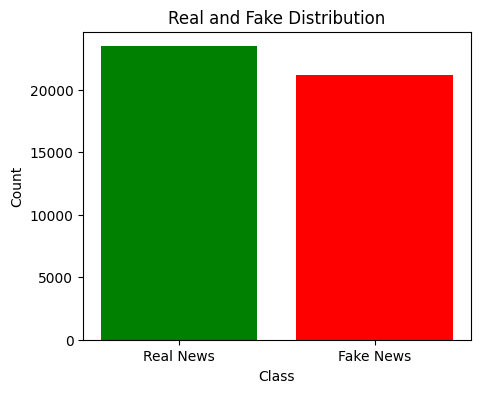

In [22]:
# Explore class distribution
class_distribution = News_df['TF'].value_counts()
class_labels = ['Real News', 'Fake News']
colors = ['green', 'red']  # Assign colors to the classes


# Create a bar chart
plt.figure(figsize=(5, 4))
plt.bar(class_labels, class_distribution,color=colors)
plt.title("Real and Fake Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


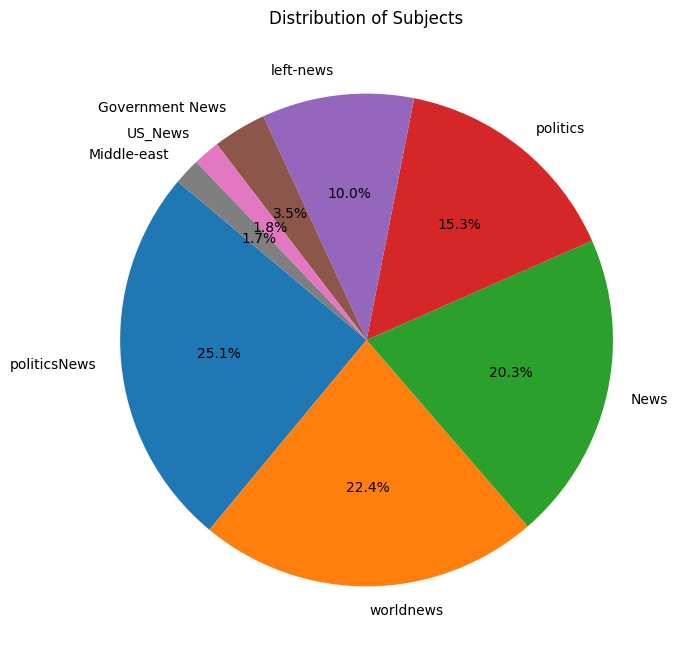

In [23]:
import matplotlib.pyplot as plt

# Get the counts of each unique subject
subject_counts = News_df['subject'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Subjects")
plt.show()


<Figure size 1200x600 with 0 Axes>

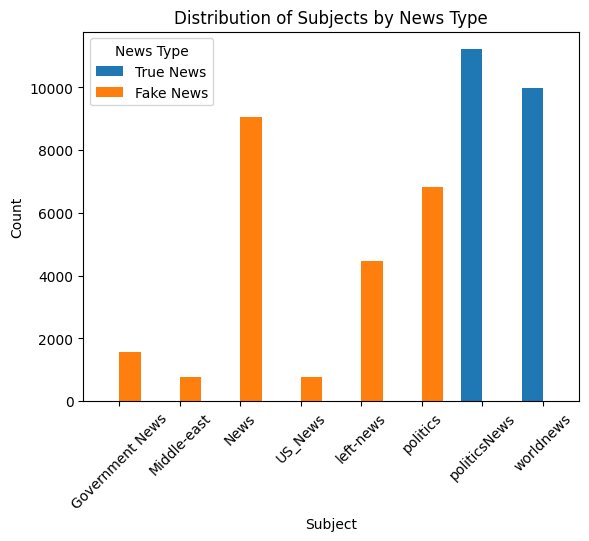

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the counts of each unique subject for true news
true_subject_counts = News_df[News_df['TF'] == 1]['subject'].value_counts()

# Get the counts of each unique subject for fake news
fake_subject_counts = News_df[News_df['TF'] == 0]['subject'].value_counts()

# Create a DataFrame for plotting
subject_counts_df = pd.DataFrame({'True News': true_subject_counts, 'Fake News': fake_subject_counts})

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
subject_counts_df.plot(kind='bar', width=0.7)
plt.title("Distribution of Subjects by News Type")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='News Type')
plt.show()


# Text Analysis

# 1: Text Length Distribution:

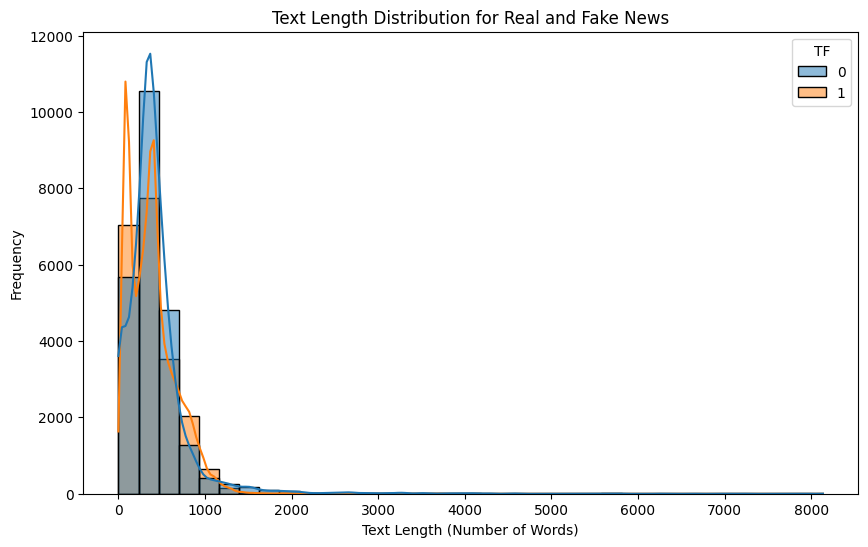

In [25]:
# Calculate text lengths
News_df['text_length'] = News_df['text'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=News_df, x='text_length', hue='TF', bins=35, kde=True)
plt.title('Text Length Distribution for Real and Fake News')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


## Reason for Plotting: Visualizing text length distribution helps identify potential differences between real and fake news articles, aiding in feature understanding.
## Major Insights: It allows you to observe whether one category tends to have consistently longer or shorter articles than the other.
## Model Use: Text length can serve as a feature in models; variations may contribute to distinguishing between real and fake news during classification.  

# 2: sentiment analysis

In [26]:
from textblob import TextBlob

# Create a function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'text' column
News_df['sentiment'] = News_df['text'].apply(get_sentiment)

# Display the sentiment scores
print(News_df[['text', 'sentiment']])


                                                    text  sentiment
0      ERBIL/KIRKUK, Iraq (Reuters) - The United Stat...   0.120918
1      Thankfully, Chris Christie proved he was beyon...   0.119922
2      While an armed militia group of domestic terro...   0.136296
3      Don t you just love the absolute boldness of t...   0.102597
4      While a group of Americans were vacationing in...   0.106333
...                                                  ...        ...
44679  DUBAI (Reuters) - A ballistic missile fired by...   0.001679
44680  CLEVELAND (Reuters) - The U.S. Republican Part...  -0.019318
44681  How shocking is it that liberal Senator Diane ...   0.088462
44682  WASHINGTON (Reuters) - President-elect Donald ...   0.018674
44683  WE COULDN T AGREE MORE! Former FBI Assistant D...   0.045922

[44684 rows x 2 columns]


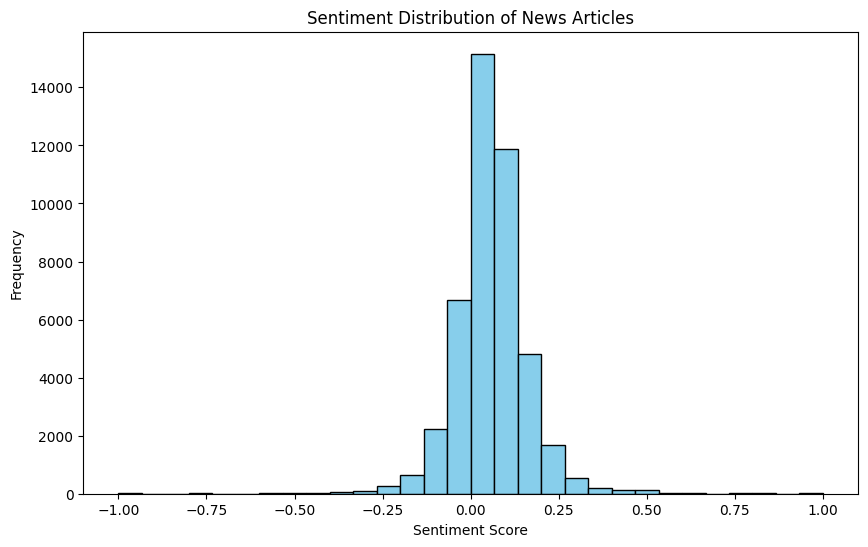

In [27]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(News_df['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of News Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


## Reason for Plotting: Visualizing sentiment distribution provides insights into the overall sentiment of news articles, aiding in understanding the emotional tone.
## Major Insights: The histogram illustrates the prevailing sentiment in the dataset, showcasing whether the articles are generally positive, negative, or neutral.
## Model Use: Sentiment scores can be used as features for models, potentially influencing the classification of real and fake news based on emotional cues.

# WordCloud Comparison

## True and Fake news datasets

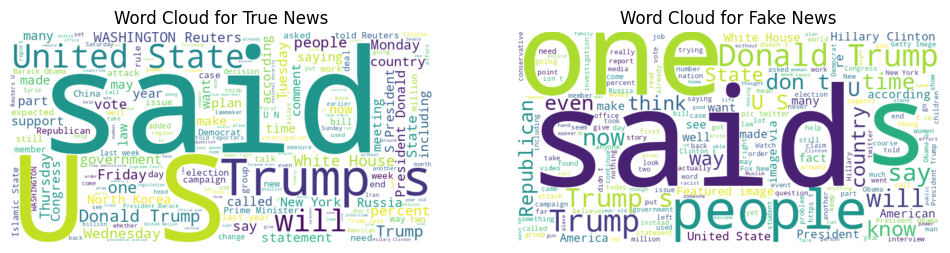

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the data into true and fake datasets
true_df = News_df[News_df['TF'] == 1]
fake_df = News_df[News_df['TF'] == 0]

# Create WordCloud for true news
true_text = ' '.join(true_df['text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)

# Create WordCloud for fake news
fake_text = ' '.join(fake_df['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Plot the WordClouds side by side for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.show()


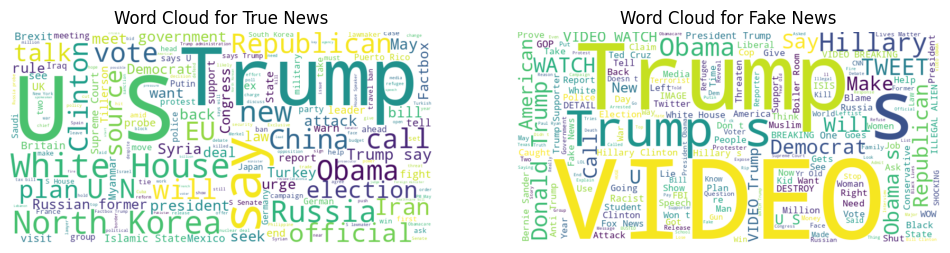

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the data into true and fake datasets
true_df = News_df[News_df['TF'] == 1]
fake_df = News_df[News_df['TF'] == 0]

# Create WordCloud for true news
true_text = ' '.join(true_df['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)

# Create WordCloud for fake news
fake_text = ' '.join(fake_df['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Plot the WordClouds side by side for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.show()


# TF-IDF representations

## Unigrams (1-grams)

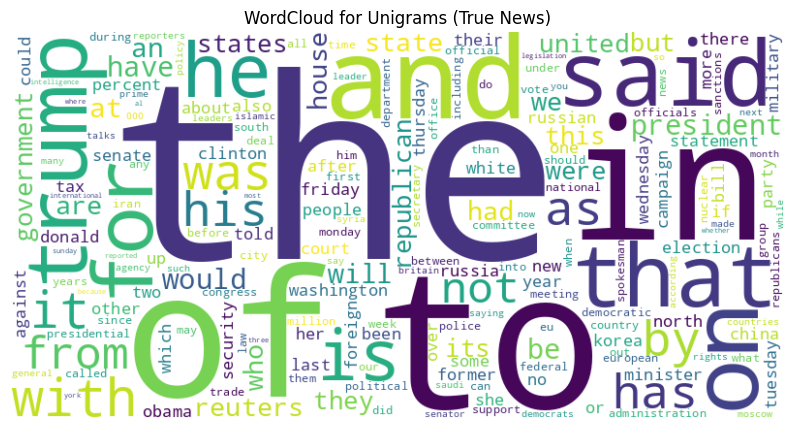

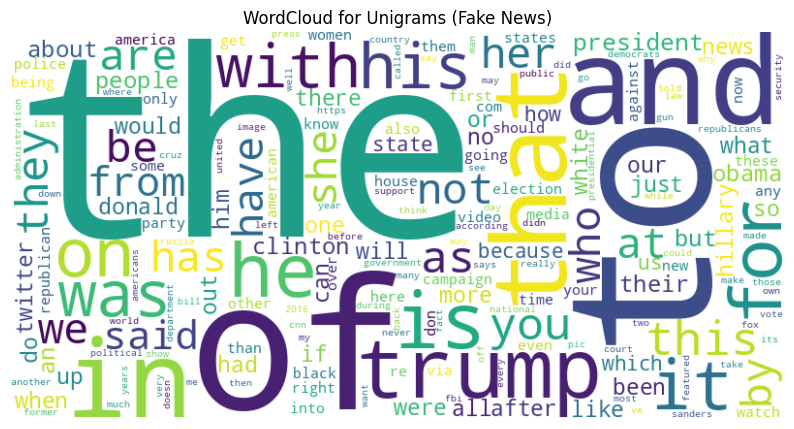

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the data into true and fake datasets
true_df = News_df[News_df['TF'] == 1]
fake_df = News_df[News_df['TF'] == 0]

# Function to create and plot WordCloud from TF-IDF for n-grams
def plot_tfidf_wordcloud(data, ngram_range, title):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_matrix = vectorizer.fit_transform(data['text'])
    feature_names = vectorizer.get_feature_names_out()

    # Sum up the TF-IDF scores for each feature across all documents
    tfidf_scores = tfidf_matrix.sum(axis=0).A1

    # Create a dictionary with feature names and their corresponding TF-IDF scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot WordCloud for unigrams (1-grams)
plot_tfidf_wordcloud(true_df, ngram_range=(1, 1), title='WordCloud for Unigrams (True News)')
plot_tfidf_wordcloud(fake_df, ngram_range=(1, 1), title='WordCloud for Unigrams (Fake News)')


# Bigrams (2-grams)

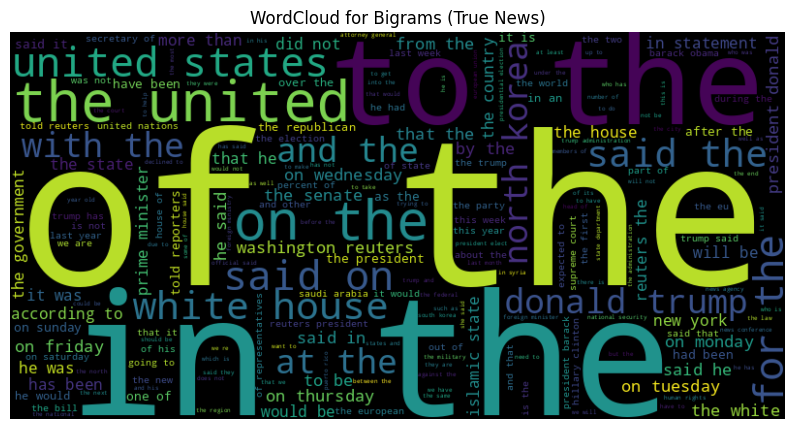

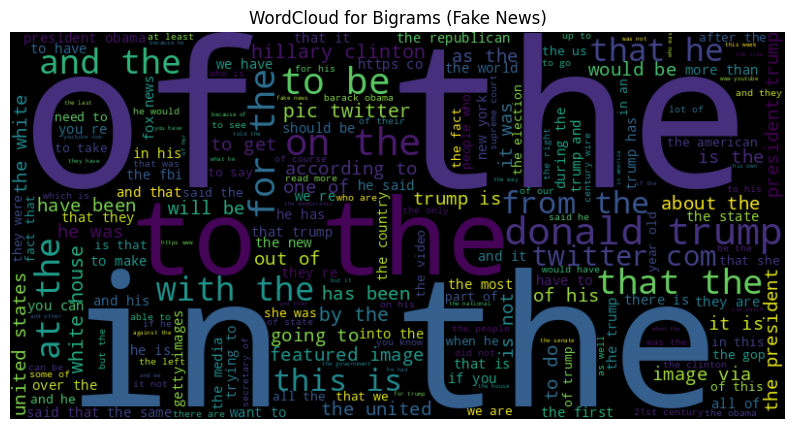

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the data into true and fake datasets
true_df = News_df[News_df['TF'] == 1]
fake_df = News_df[News_df['TF'] == 0]

# Function to create and plot WordCloud from TF-IDF for n-grams
def plot_tfidf_wordcloud(data, ngram_range, title):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_matrix = vectorizer.fit_transform(data['text'])
    feature_names = vectorizer.get_feature_names_out()

    # Sum up the TF-IDF scores for each feature across all documents
    tfidf_scores = tfidf_matrix.sum(axis=0).A1

    # Create a dictionary with feature names and their corresponding TF-IDF scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(tfidf_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot WordCloud for bigrams (2-grams)
plot_tfidf_wordcloud(true_df, ngram_range=(2, 2), title='WordCloud for Bigrams (True News)')
plot_tfidf_wordcloud(fake_df, ngram_range=(2, 2), title='WordCloud for Bigrams (Fake News)')


# Trigrams (3-grams)

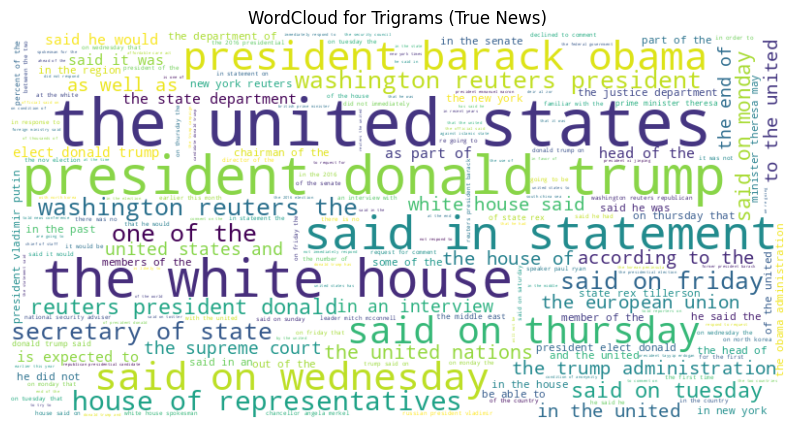

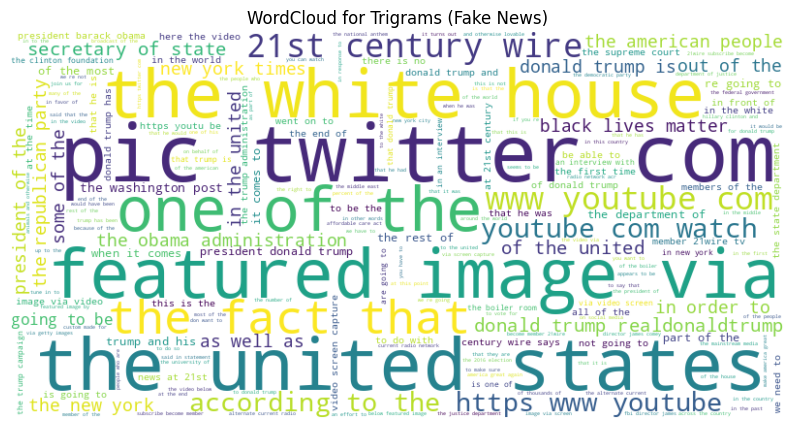

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the data into true and fake datasets
true_df = News_df[News_df['TF'] == 1]
fake_df = News_df[News_df['TF'] == 0]

# Function to create and plot WordCloud from TF-IDF for n-grams
def plot_tfidf_wordcloud(data, ngram_range, title):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_matrix = vectorizer.fit_transform(data['text'])
    feature_names = vectorizer.get_feature_names_out()

    # Sum up the TF-IDF scores for each feature across all documents
    tfidf_scores = tfidf_matrix.sum(axis=0).A1

    # Create a dictionary with feature names and their corresponding TF-IDF scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot WordCloud for trigrams (3-grams)
plot_tfidf_wordcloud(true_df, ngram_range=(3, 3), title='WordCloud for Trigrams (True News)')
plot_tfidf_wordcloud(fake_df, ngram_range=(3, 3), title='WordCloud for Trigrams (Fake News)')


# Building a model using TF-IDF

# Unigrams (1-grams)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
# Set max_features to limit the number of features
max_features = 7200
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.99
Confusion Matrix:
[[4625   71]
 [  46 4195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4241

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937



In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine training and testing data for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Use TF-IDF to convert text data into numerical features
X_combined_tfidf = vectorizer.transform(X_combined)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_combined_tfidf, y_combined, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


for i, (train_idx, test_idx) in enumerate(kf.split(X_combined_tfidf, y_combined), 1):
    X_train_fold, X_test_fold = X_combined_tfidf[train_idx], X_combined_tfidf[test_idx]
    y_train_fold, y_test_fold = y_combined.iloc[train_idx], y_combined.iloc[test_idx]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
    classification_rep_fold = classification_report(y_test_fold, y_pred_fold)

    print(f"\nFold {i}:")
    print(f"Accuracy: {accuracy_fold:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix_fold)
    print("Classification Report:")
    print(classification_rep_fold)

Cross-validation Scores: [0.98769162 0.98713215 0.98646078 0.98881056 0.98589973]
Mean Accuracy: 0.9871989683278823

Fold 1:
Accuracy: 0.99
Confusion Matrix:
[[4629   66]
 [  44 4198]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4695
           1       0.98      0.99      0.99      4242

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937


Fold 2:
Accuracy: 0.99
Confusion Matrix:
[[4627   68]
 [  47 4195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4695
           1       0.98      0.99      0.99      4242

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937


Fold 3:
Accuracy: 0.99
Confusion Matrix:
[[46

# Bigrams (2-grams)


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
max_features = 6800
vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.99
Confusion Matrix:
[[4626   70]
 [  56 4185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4241

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937



In [36]:
# Use TF-IDF to convert text data into numerical features
X_combined_tfidf = vectorizer.transform(X_combined)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_combined_tfidf, y_combined, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


for i, (train_idx, test_idx) in enumerate(kf.split(X_combined_tfidf, y_combined), 1):
    X_train_fold, X_test_fold = X_combined_tfidf[train_idx], X_combined_tfidf[test_idx]
    y_train_fold, y_test_fold = y_combined.iloc[train_idx], y_combined.iloc[test_idx]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
    classification_rep_fold = classification_report(y_test_fold, y_pred_fold)

    print(f"\nFold {i}:")
    print(f"Accuracy: {accuracy_fold:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix_fold)
    print("Classification Report:")
    print(classification_rep_fold)

Cross-validation Scores: [0.98702025 0.98668457 0.98388721 0.98646078 0.98645927]
Mean Accuracy: 0.9861024160068455

Fold 1:
Accuracy: 0.99
Confusion Matrix:
[[4634   61]
 [  55 4187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4695
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937


Fold 2:
Accuracy: 0.99
Confusion Matrix:
[[4632   63]
 [  56 4186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4695
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937


Fold 3:
Accuracy: 0.98
Confusion Matrix:
[[46

# Trigrams (3-grams)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
max_features = 7800
vectorizer = TfidfVectorizer(ngram_range=(3, 3), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.97
Confusion Matrix:
[[4583  113]
 [ 157 4084]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4696
           1       0.97      0.96      0.97      4241

    accuracy                           0.97      8937
   macro avg       0.97      0.97      0.97      8937
weighted avg       0.97      0.97      0.97      8937



In [42]:
# Combine training and testing data for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Use TF-IDF to convert text data into numerical features
X_combined_tfidf = vectorizer.transform(X_combined)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_combined_tfidf, y_combined, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Optionally, you can print other metrics for each fold
for i, (train_idx, test_idx) in enumerate(kf.split(X_combined_tfidf, y_combined), 1):
    X_train_fold, X_test_fold = X_combined_tfidf[train_idx], X_combined_tfidf[test_idx]
    y_train_fold, y_test_fold = y_combined.iloc[train_idx], y_combined.iloc[test_idx]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
    classification_rep_fold = classification_report(y_test_fold, y_pred_fold)

    print(f"\nFold {i}:")
    print(f"Accuracy: {accuracy_fold:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix_fold)
    print("Classification Report:")
    print(classification_rep_fold)

Cross-validation Scores: [0.97303346 0.97180262 0.97202641 0.97269777 0.97112802]
Mean Accuracy: 0.9721376553210582

Fold 1:
Accuracy: 0.97
Confusion Matrix:
[[4600   95]
 [ 146 4096]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4695
           1       0.98      0.97      0.97      4242

    accuracy                           0.97      8937
   macro avg       0.97      0.97      0.97      8937
weighted avg       0.97      0.97      0.97      8937


Fold 2:
Accuracy: 0.97
Confusion Matrix:
[[4587  108]
 [ 144 4098]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4695
           1       0.97      0.97      0.97      4242

    accuracy                           0.97      8937
   macro avg       0.97      0.97      0.97      8937
weighted avg       0.97      0.97      0.97      8937


Fold 3:
Accuracy: 0.97
Confusion Matrix:
[[45

# Unigrams,Bigrams,Trigrams

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
max_features = 6800
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.99
Confusion Matrix:
[[4637   59]
 [  41 4200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4241

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937



# .'. As Unigrams and Bigrams is giving high accuracy with 99% we will go with Both.

# LogisticRegression

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
max_features = 7800
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.99
Confusion Matrix:
[[4638   58]
 [  39 4202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4241

    accuracy                           0.99      8937
   macro avg       0.99      0.99      0.99      8937
weighted avg       0.99      0.99      0.99      8937



# RandomForestClassifier

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
max_features = 7800
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 1.00
Confusion Matrix:
[[4687    9]
 [   9 4232]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4241

    accuracy                           1.00      8937
   macro avg       1.00      1.00      1.00      8937
weighted avg       1.00      1.00      1.00      8937



# XGBoost classifier

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the data into features (X) and target variable (y)
X = News_df['text']
y = News_df['TF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert text data into numerical features
max_features = 7800
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train an XGBoost classifier
model = XGBClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 1.00
Confusion Matrix:
[[4687    9]
 [  12 4229]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4241

    accuracy                           1.00      8937
   macro avg       1.00      1.00      1.00      8937
weighted avg       1.00      1.00      1.00      8937

